In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


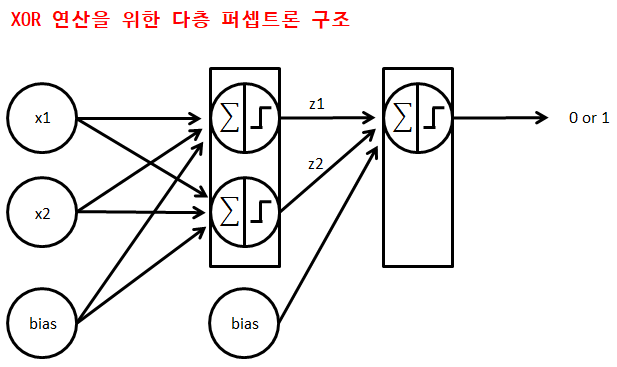

In [3]:
from IPython.display import Image
Image('./multiLayrePerceptron.png')

XOR 연산은 입력데이터를 X라고 할 경우 [[0, 0], [0, 1], [1, 0], [1, 1]]과 같은 경우의 수가 있다.  
총 4개의 데이터가 2개의 아이템을 가지고 있으므로 X는 [4, 2]의 형태로 정의할 수 있다.  
입력값에 따른 출력값 Y는 [[0], [1], [1], [0]] 이므로 Y는 [4, 1]의 형태로 정의할 수 있다.

In [4]:
X = tf.placeholder(tf.float32, shape=[4, 2]) # 입력값
Y = tf.placeholder(tf.float32, shape=[4, 1]) # 출력값

1번째 히든 레이어에서 2개의 입력(X)과 한개의 편향값(B1)을 받아 2개의 시그모이드 출력(Z)을 다음 레이어로 전달한다.

In [6]:
# 2개의 입력을 받는 2개의 뉴런을 만든다.
# random_normal()은 정규 분포로 부터의 난수값을 반환하고 random_uniform()은 균등 분포로 부터의 난수값을 반환한다.
W1 = tf.Variable(tf.random_uniform([2, 2]))
# 각 뉴런은 1개의 편향값을 가진다.
# zeros()는 모든 원소의 값이 0인 텐서를 생성한다.
B1 = tf.Variable(tf.zeros([2]))
# 시그모이드를 거쳐 출력값으로 Z를 리턴한게 한다. => sigmoid(W1 * X + B1)
Z = tf.sigmoid(tf.matmul(X, W1) + B1)

2번째 히든 레이어어서 1번째 히든 레이어의 출력값인 Z와 1개의 편향값(B2)을 받아 1개의 시그모이드를 출력(Y_hat)한다.

In [7]:
# Z를 입력값으로 받는 1개의 뉴런을 만든다.
W2 = tf.Variable(tf.random_uniform([2, 1]))
# 각 뉴런은 1개의 편향값을 가진다.
B2 = tf.Variable(tf.zeros([1]))
# 출력값으로 Y_hat을 리턴하게 한다. => sigmoid(W2 * Z + B2)
Y_hat = tf.sigmoid(tf.matmul(Z, W2) + B2)

손실 함수로 크롤스 엔트로피를 사용하고 경사 하강법으로 모델의 매개 변수(가중치, 편향값)을 최적화 한다.

In [8]:
# 크로스 엔트로피
loss = tf.reduce_mean(-1 * (
    Y * tf.log(Y_hat) + (1 - Y) * tf.log(1.0 - Y_hat)
))
# 경사 하강법
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
# 모델을 학습하기 위한 학습 데이터를 만든다.
train_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
train_Y = [[0], [1], [1], [0]]

학습을 진행한다.

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('학습 데이터: {}'.format(train_X))
    print('=' * 80)
    # 2만 번의 반복 학습을 진행한다.
    for i in range(20000):
        sess.run(train_step, feed_dict={X: train_X, Y: train_Y})
        if i % 5000 == 0:
            print('epoch: {0:5d}'.format(i))
            print('output:\n {}'.format(sess.run(Y_hat, feed_dict={X: train_X, Y: train_Y})))
            print('=' * 80)
    # =================
    print('최종 학습 결과:\n {}'.format(sess.run(Y_hat, feed_dict={X: train_X, Y: train_Y})))

학습 데이터: [[0, 0], [0, 1], [1, 0], [1, 1]]
epoch:     0
output:
 [[0.6046843]
 [0.6274479]
 [0.6251776]
 [0.6452218]]
epoch:  5000
output:
 [[0.408395 ]
 [0.5289788]
 [0.531994 ]
 [0.5621398]]
epoch: 10000
output:
 [[0.11542612]
 [0.83661556]
 [0.836621  ]
 [0.23482016]]
epoch: 15000
output:
 [[0.03923914]
 [0.9656513 ]
 [0.96562946]
 [0.04042596]]
최종 학습 결과:
 [[0.02235708]
 [0.98216486]
 [0.9821563 ]
 [0.01993281]]
